In [202]:
# Linear model

In [203]:
## Problem: does the height and weight of a player sufficient to impact her spiking and blocking statistic ?
## Can we use height and weight of a player to predict her spiking and blocking range ?

In [204]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import pandas
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from matplotlib import pyplot
from scipy import stats
import math

In [205]:
data = pandas.read_csv(r'C:\Users\Pende\Documents\myapps\my_machine_learning\data\japan_2018_fixed.csv')

In [206]:
df = pandas.DataFrame(data=data, columns=['height', 'weight', 'spike', 'block'])

In [207]:
# pyplot.plot(df['height'], 'o', color='blue')

# pyplot.title('Mapping height')
# pyplot.xlabel('Qt')
# pyplot.ylabel('Height')
# pyplot.legend()
# pyplot.show()

In [208]:
# Measures the correlation between two variables
df[['height', 'weight', 'spike', 'block']].corr()

,height,weight,spike,block
height,1.000000,0.649350,0.598909,0.604115
weight,0.649350,1.000000,0.363306,0.349306
spike,0.598909,0.363306,1.000000,0.865221
block,0.604115,0.349306,0.865221,1.000000


In [209]:
# df[['height']].hist()

In [210]:
# If skew < -1 or skew > +1, high skew
# If 1 > skew < 1/2 or 1/2 > skew < +1, moderate skew
# If 1/2 > skew < +1/2, approximate symmetry
stats.skew(df['height'])
stats.skew(df['weight'])
stats.skew(df['spike'])
stats.skew(df['block'])


# If k = 3, normal distribution
# If k < 3, center peak low and broad
# If k > 3, center peak high and sharp
stats.kurtosistest(df['height'])
stats.kurtosistest(df['weight'])
stats.kurtosistest(df['spike'])
stats.kurtosistest(df['block'])

KurtosistestResult(statistic=6.41628427478928, pvalue=1.3964058797362992e-10)

In [211]:
X = df[['height']]
y = df['spike']

In [212]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, random_state=1)

In [213]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [214]:
intercept = model.intercept_
coefficient = model.coef_

print('Line intercept:', round(intercept, 3))
print('Coefficient:', coefficient)

Line intercept: 23.1
Coefficient: [1.48953175]


In [215]:
observation = [[186]]
prediction = model.predict(observation)
print('If the player height is %s then her spike would be %s' % (observation[0][0], round(prediction[0], 1)))

If the player height is 186 then her spike would be 300.2


In [216]:
y_predict = model.predict(X_test)
y_predict[:5]

array([303.13229968, 301.64276793, 285.25791872, 300.15323618,
       286.74745047])

In [217]:
# Mean Absolute Error
mae = mean_absolute_error(y_test, y_predict)

# Mean Squared Error
mse = mean_squared_error(y_test, y_predict)

print('Can be used but not essential. %s' % mae)
print('The magnitude of errors is: %s' % mse)

# The mean average errors made by
# the model in centimeters (cm)
model_rse = math.sqrt(mse)

print('The model is making errors of %scm in average' % round(model_rse, 2))

Can be used but not essential. 11.796235555094185
The magnitude of errors is: 292.85617411670137
The model is making errors of 17.11cm in average


In [220]:
# Measure how well the data fits the model.
# High: does not fit the model
# Low: fits the model
print('We can explain %s of our features with the model:' % round(r2_score(y_test, y_predict), 2))

We can explain 0.42 of our features with the model:


In [221]:
# Print the residuals


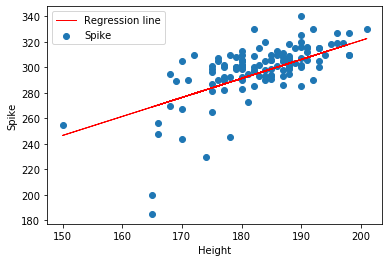

In [224]:
pyplot.scatter(X_test, y_test, label='Spike')
pyplot.plot(X_test, y_predict, color='red', linewidth=1, linestyle='-', label='Regression line')
pyplot.xlabel('Height')
pyplot.ylabel('Spike')
pyplot.legend()
pyplot.show()

In [231]:
# Saving the model
import pickle

with open('linear_model.sav', 'wb') as m:
    pickle.dump(model, m)

In [235]:
with open('linear_model.sav', 'rb') as m:
    loaded_model = pickle.load(m)

loaded_model.predict([[189]])

array([304.62183142])